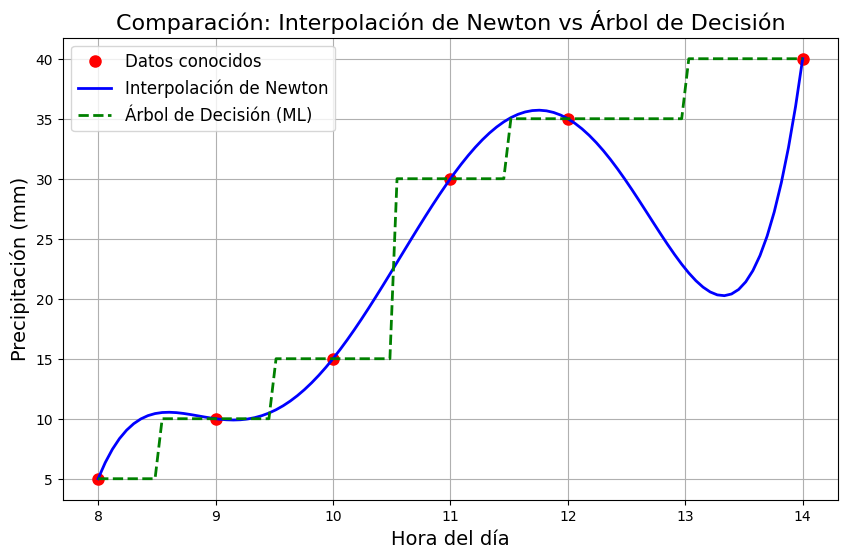

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Función para calcular la tabla de diferencias divididas
def divided_diff(x, y):
    """Calcular la tabla de diferencias divididas."""
    n = len(x)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y  # Llenar la primera columna con los valores de y

    # Calcular diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i, j] = (diff_table[i + 1, j - 1] - diff_table[i, j - 1]) / (x[i + j] - x[i])

    return diff_table[0, :]  # Devolver la primera fila (coeficientes)

# Función para la interpolación de Newton
def newton_interpolation(x, y, val):
    """Interpolar usando el polinomio de Newton."""
    coeff = divided_diff(x, y)
    n = len(coeff)
    result = coeff[0]

    for i in range(1, n):
        term = coeff[i]
        for j in range(i):
            term *= (val - x[j])
        result += term

    return result

# Datos extendidos: Horas y niveles de precipitación (en mm)
x = np.array([8, 9, 10, 11, 12, 14]).reshape(-1, 1)  # Horas del día (reshape para scikit-learn)
y = np.array([5, 10, 15, 30, 35, 40])  # Precipitación en mm

# 1. Árbol de Decisión para predicción
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(x, y)  # Entrenar el modelo

# Evaluar el árbol de decisión en puntos continuos
x_eval = np.linspace(8, 14, 100).reshape(-1, 1)
y_tree = tree_model.predict(x_eval)

# 2. Interpolación de Newton
y_newton = [newton_interpolation(x.flatten(), y, val) for val in x_eval.flatten()]

# Gráfica comparativa
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Datos conocidos', markersize=8, color='red')  # Puntos originales
plt.plot(x_eval, y_newton, '-', label='Interpolación de Newton', linewidth=2, color='blue')
plt.plot(x_eval, y_tree, '--', label='Árbol de Decisión (ML)', linewidth=2, color='green')

# Mejorar la visualización
plt.title('Comparación: Interpolación de Newton vs Árbol de Decisión', fontsize=16)
plt.xlabel('Hora del día', fontsize=14)
plt.ylabel('Precipitación (mm)', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.show()
